Bert+Bi-LSTM模型

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  
from sklearn.metrics import roc_curve, auc  
import matplotlib.pyplot as plt  
import numpy as np  
import tensorflow as tf
from keras.layers import LSTM, Bidirectional, Dense, Attention
from keras.models import Model
import pandas as pd
from keras.src.callbacks import LambdaCallback
from imblearn.over_sampling import SMOTE
import torch
from keras import optimizers
import keras

In [91]:
# #均衡采样
# def smote(X_train, y_train):
#     # Create an instance of SMOTE
#     smote = SMOTE(random_state=10)
#     # Apply SMOTE to the training data
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#     return X_train_resampled, y_train_resampled

In [8]:
 # 加载训练集和测试集 

y_train = pd.read_csv(r"data_embedding_smote/y_train_smote.csv")
y_test = pd.read_csv(r"data_embedding_smote/y_test_smote.csv")

In [9]:
#smote前数据
# X_train_embedding=torch.load('data_embedding/train_embedding.pt',map_location=torch.device('cpu')).numpy()

#smote后数据
X_train_embedding=torch.load('data_embedding_smote/train_embedding_smote.pt',map_location=torch.device('cpu')).numpy()

#smote前数据
# X_test_embedding=torch.load('data_embedding/test_embedding.pt',map_location=torch.device('cpu')).numpy()

#smote后数据
X_test_embedding=torch.load('data_embedding_smote/test_embedding_somte.pt',map_location=torch.device('cpu')).numpy()

In [5]:
# #smote采样
# X_train_embedding,y_train = smote(X_train_embedding, y_train)
# X_test_embedding,y_test = smote(X_test_embedding, y_test)

In [11]:
#改变数据形状
X_train_embedding= torch.unsqueeze(torch.tensor(X_train_embedding),dim=1).numpy()
X_test_embedding= torch.unsqueeze(torch.tensor(X_test_embedding),dim=1).numpy()

In [18]:
# 构建RCNN模型
model = keras.Sequential([  
    keras.layers.Input(shape=(1,768)),  
    # keras.layers.LSTM(units=256,return_sequences=True), 
    Bidirectional(LSTM(256,return_sequences=True)),# LSTM层的输出默认是三维的(batch_size, timesteps, features)  
    keras.layers.GlobalMaxPooling1D(),  # 现在可以安全地使用GlobalMaxPooling1D层  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0001,decay=1e-5)   #注意kaggle没有legacy
model.compile(optimizer=optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy'],run_eagerly=True)

# 打印模型结构
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 1, 512)            2099200   
 onal)                                                           
                                                                 
 global_max_pooling1d_6 (Gl  (None, 512)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2173185 (8.29 MB)
Trainable params: 2173

In [7]:
# # 构建Bi-LSTM模型
# # 定义输入层
# input_layer = tf.keras.layers.Input(shape=(1,768))
# #拉平向量
# # flatten_layer = tf.keras.layers.Flatten()(input_layer)
# # 构建Bi-LSTM模型
# lstm_output = Bidirectional(LSTM(256))(input_layer)
# #拉平向量
# flatten_layer = tf.keras.layers.Flatten()(lstm_output)
# # 添加全连接层
# dense_output1 = Dense(128, activation='relu')(flatten_layer)
# dense_output2 = Dense(64, activation='relu')(dense_output1)
# 
# output= Dense(1, activation='sigmoid')(dense_output2)
# 
# 
# model = Model(inputs=input_layer, outputs=output)
# optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001,decay=1e-5)   #注意kaggle没有legacy
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'],run_eagerly=True)
# 
# # 打印模型结构
# model.summary()

In [6]:
# import keras
# 
# # 注意力机制层  
# @keras.saving.register_keras_serializable(package="custom_objects")
# class Attention(keras.layers.Layer):
#     def __init__(self, units, **kwargs):
#         super(Attention, self).__init__()
#         self.W = keras.layers.Dense(units)
#         self.V = keras.layers.Dense(1)
# 
#     def call(self, inputs):
#         query = inputs[0]
#         values = inputs[1]
# 
#         query_with_time_axis = tf.expand_dims(query, 1)
# 
#         score = tf.nn.tanh(self.W(query_with_time_axis) + self.W(values))
#         attention_weights = tf.nn.softmax(self.V(score), axis=1)
# 
#         context_vector = attention_weights * values
#         context_vector = tf.reduce_sum(context_vector, axis=1)
# 
#         return context_vector


In [7]:
# # 构建Bi-LSTM-attention模型
# # 定义输入层
# input_layer = keras.layers.Input(shape=(1,768))
# #拉平向量
# # flatten_layer = tf.keras.layers.Flatten()(input_layer)
# 
# # 构建Bi-LSTM模型
# lstm_output = Bidirectional(LSTM(256))(input_layer)
# #拉平向量
# # flatten_layer = tf.keras.layers.Flatten()(lstm_output)
# 
# #添加注意力层
# attention_output = Attention(256)([lstm_output, lstm_output])
# 
# # 添加全连接层
# dense_output1 = Dense(128, activation='relu')(attention_output)
# dense_output2 = Dense(64, activation='relu')(dense_output1)
# dense_output3 = Dense(32, activation='relu')(dense_output2)
# output= Dense(1, activation='sigmoid')(dense_output3)
# 
# model = Model(inputs=input_layer, outputs=output)
# # optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0001)#注意kaggle没有legacy
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'],run_eagerly=True)
# 
# # 打印模型结构
# model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1, 768)]             0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 512)                  2099200   ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 attention (Attention)       (None, 512)                  131585    ['bidirectional[0][0]',       
                                                                     'bidirectional[0][0]']       
                                                                                              

In [13]:
def on_epoch_end(epoch, logs):  

    # print(f'Epoch {epoch + 1}, Loss: {logs["loss"]}') 
    print(f'Epoch {epoch + 1}') 
    train_loss = logs.get('loss')  
    val_loss = logs.get('val_loss')  
    train_acc = logs.get('accuracy')  
    val_acc = logs.get('val_accuracy')  
      
    print(f'Epoch {epoch + 1}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '  
          f'Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')  
    print("\n")
    

In [19]:
# 将标签转换为one-hot编码
# y_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
# 训练模型
callback = LambdaCallback(on_epoch_end=on_epoch_end)
history = model.fit(tf.convert_to_tensor(X_train_embedding), y_train, epochs=32,shuffle=True, validation_split=0.2, batch_size=32, callbacks=[callback])

Epoch 1/32
  42/5903 [..............................] - ETA: 13:29 - loss: 0.2016 - accuracy: 0.6897

KeyboardInterrupt: 

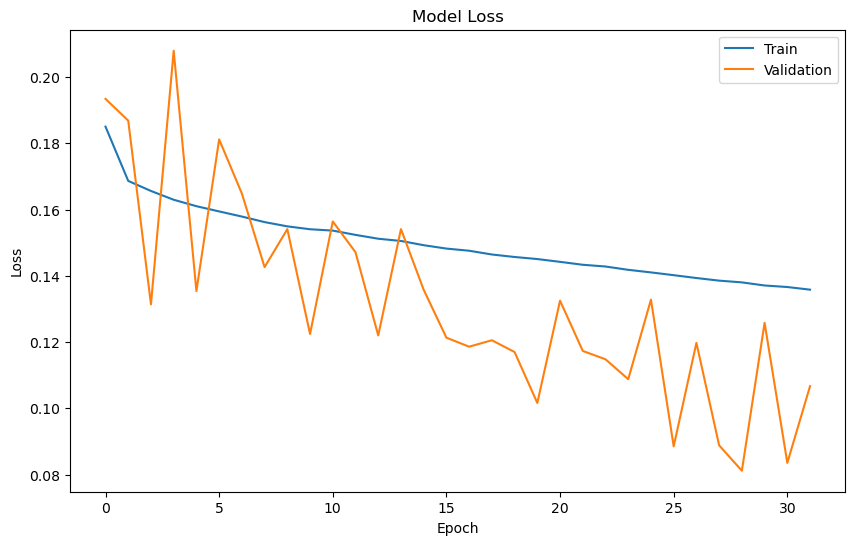

In [14]:
#绘制loss曲线
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
# plt.savefig('Bert_Bi-LSTM_Attention_loss.png')
plt.savefig('RCNN_loss.png')
plt.show()

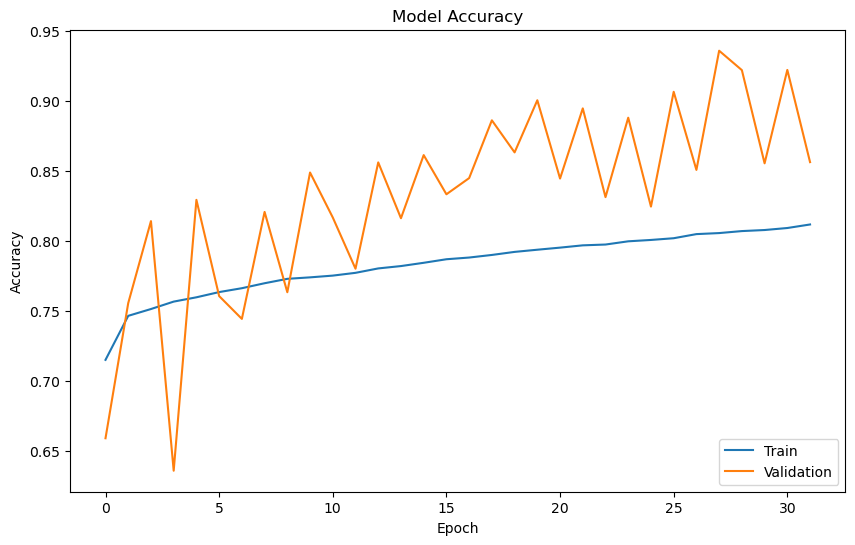

In [15]:
#绘制准确率曲线
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
# plt.savefig('Bert_Bi-LSTM_Attention_accuracy.png')
plt.savefig('RCNN_accuracy.png')
plt.show()

In [16]:
#使用tensorflow保存
model.save('RCNN.keras')

In [17]:
# 评估模型
score = model.evaluate(X_test_embedding, y_test, verbose=0)  
print('Test loss:', score[0])  
print('Test accuracy:', score[1])

Test loss: 0.1450052112340927
Test accuracy: 0.7912048697471619


In [12]:
#bert_bi-lstm模型的评价
def evaluate_bert_bilstm_model(model, X_test, y_test):

    # Predict probabilities
    y_pred_proba = model.predict(X_test)
    
    # Predict labels
    y_pred=np.where(y_pred_proba>0.5,1,0)
    
    # Calculate accuracy, precision, recall, F1-score, and AUC
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    return [accuracy, precision, recall, f1, auc,fpr.tolist(), tpr.tolist()]

In [19]:
import json

#计算模型的评价指标
metrics_name = ['accuracy', 'precision', 'recall', 'f1-score','auc','fpr-score','tpr-score']
#计算每个模型的评价指标值，然后按照模型名，指标名称将结果存入一个字典

metrics = evaluate_bert_bilstm_model(model, tf.convert_to_tensor(X_test_embedding), y_test)
# bert_bilstm_metrics_dict = {metrics_name[j]: metrics[j] for j in range(len(metrics))} 
RCNN_metrics_dict = {metrics_name[j]: metrics[j] for j in range(len(metrics))} 

1850/1850 [==============================] - 115s 62ms/step


In [21]:
#以json文件保存字典结果
with open('RCNN_metrics_dict.json', 'w') as f:
    json.dump(RCNN_metrics_dict, f)